In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rotations
from WooferConfig import WOOFER_CONFIG
import quaternion
%matplotlib notebook
plt.rcParams['figure.figsize'] = (14,8)

In [2]:
data = np.load('woofer_numpy_log.npz')
est = np.load('woofer_ekf_state_est_log.npz')['arr_0']

n = np.shape(est)[1]

n_data = np.shape(data['state_history'])[1]

x error:  0.03606511457437303
y error:  0.01191216821172629
z error:  0.00584865397624409


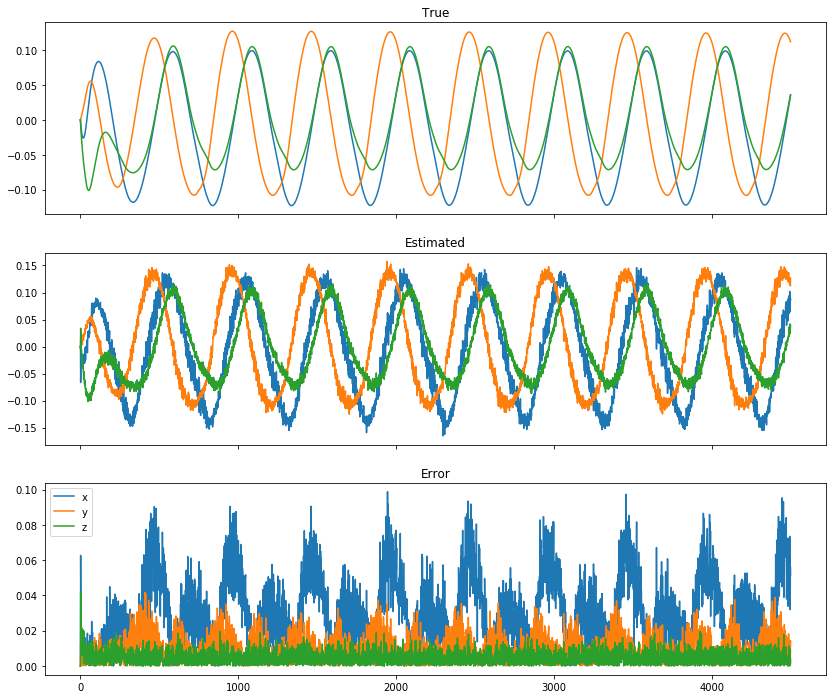

In [3]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true_inertial = data['state_history'][7:10,:n]
x_true_body = np.zeros((3, n))
for i in range(n):
    x_true_body[:,i] = rotations.quat2mat(data['state_history'][3:7, i]).T @ x_true_inertial[:,i]

l1 = ax1.plot(x_true_body.T)
ax1.set_title('True')

x_est = est[0:3,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true_body)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')

rms = np.sqrt(np.mean(np.square(p_diff[0,:])))
print("x error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[1,:])))
print("y error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[2,:])))
print("z error: ", rms)

fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('x', 'y', 'z'))
plt.show()


roll error:  0.03801331956021354
pitch error:  0.02061145359341469


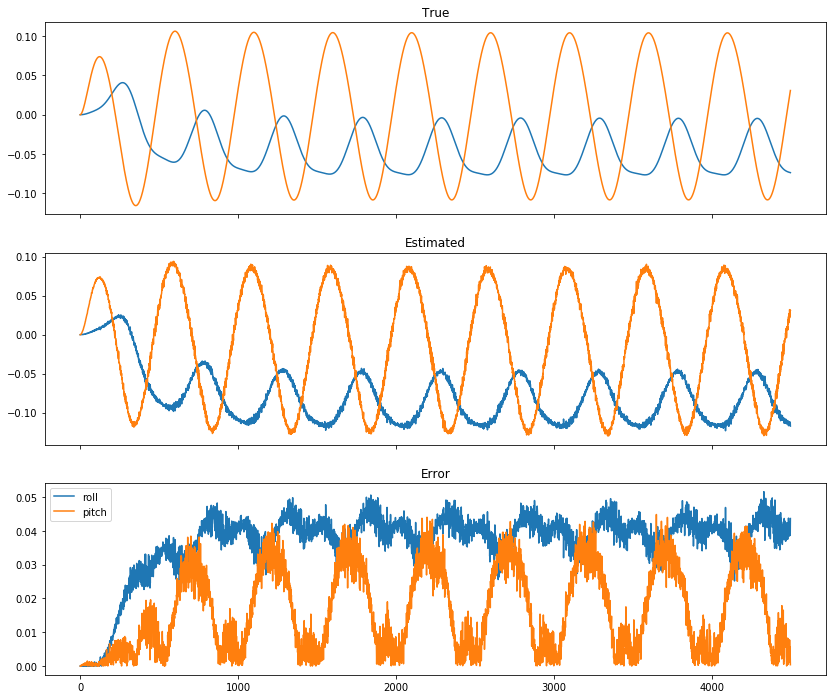

In [4]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, sharex=True)
x_true_q = data['state_history'][3:7,:n]
x_true_rp = np.zeros((2, n))
for i in range(n):
    x_true_rp[:, i] = rotations.quat2euler(x_true_q[:,i])[0:2]
l1 = ax1.plot(x_true_rp.T)
ax1.set_title('True')

x_est = est[3:5,:]

l2 = ax2.plot(x_est.T)
ax2.set_title('Estimated')

p_diff = np.abs(x_est - x_true_rp)
l3 = ax3.plot(p_diff.T)
ax3.set_title('Error')


rms = np.sqrt(np.mean(np.square(p_diff[0,:])))
print("roll error: ", rms)

rms = np.sqrt(np.mean(np.square(p_diff[1,:])))
print("pitch error: ", rms)

fig.set_size_inches(14,12)
# plt.legend(('x','y','z','q0','q1','q2','q3','vx','vy', 'vz', 'wx_b', 'wy_b', 'wz_b'))
plt.legend(('roll', 'pitch'))
plt.show()
